In [1]:
from Gaussian import Gaussian
from EM import EM
from NN import NN
import numpy as np

In [2]:
D = 2
K = 8
method_number = 5
sample_number = 10

# parameters for neural networks
neuron_1     = {0: K}
neuron_2_10  = {0: 10, 1: K}
neuron_2_100 = {0: 100, 1: K}
act_func_1 = {0: NN.softmax}
act_func_2 = {0: NN.relu, 1: NN.softmax}

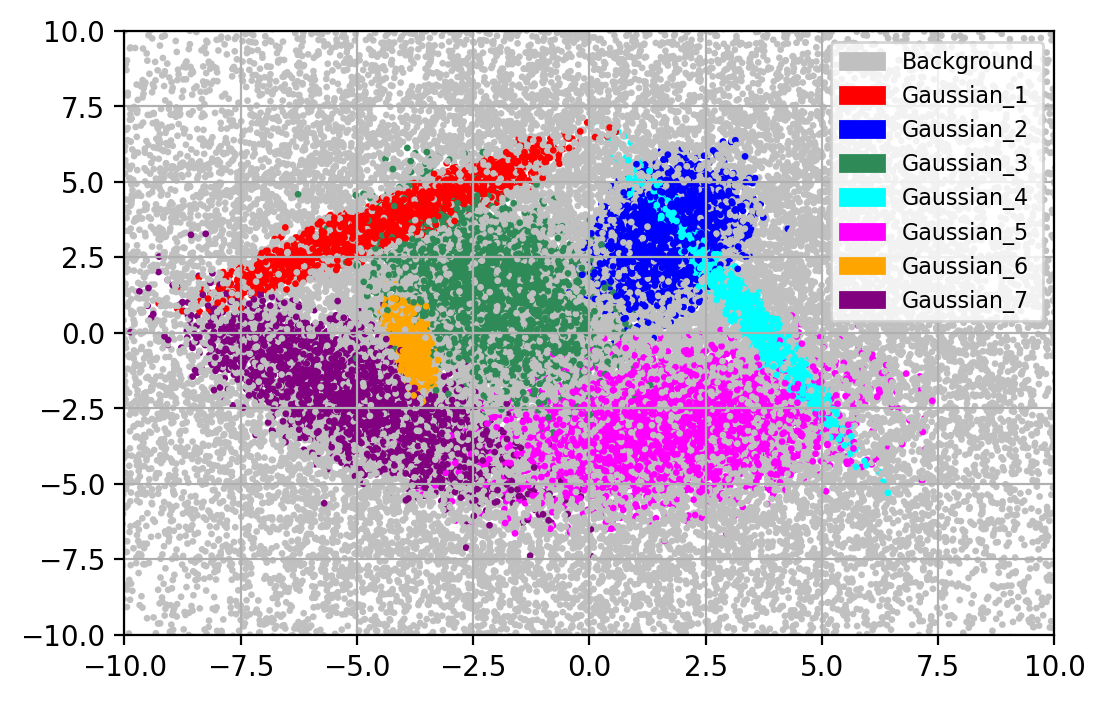

In [ ]:
accuracy = np.zeros([sample_number, method_number])
time     = np.zeros([sample_number, method_number])

for i in range(sample_number):
    G = Gaussian(D=D, K=K)
    G.plot_sample()

    method_set = [EM(K),
                  NN(D, neuron_1, act_func_1, NN_type="QNN"),
                  NN(D, neuron_1, act_func_1, NN_type="LNN"),
                  NN(D, neuron_2_10, act_func_2, NN_type="LNN"),
                  NN(D, neuron_2_100, act_func_2, NN_type="LNN")]

    for j in range(method_number):
        method = method_set[j]
        if j == 0:
            method.train(G.train_point)
            method.order_correction(G.valid_point, G.valid_label)
        else:
            method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

        accuracy[i][j] = method.test(G.test_point, G.test_label)[0] * 100
        time[i][j]     = method.train_time